<a href="https://colab.research.google.com/github/TKV-JONGIN/BigData/blob/main/12%EC%9E%A5_%EC%8B%9C%EA%B3%84%EC%97%B4%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.linear_model import LinearRegression
ts= pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/12_covid19.csv"
    ,encoding='euc_kr').filter(['날짜','전일대비증감수'])
ts['날짜']= ts['날짜'].astype('datetime64')
ts =ts.set_index('날짜')
ts_head=ts.head(334)
ts_tail=ts.tail(31)

,count,mean,std,min,25%,50%,75%,max
전일대비증감수,334.0,405.152695,336.013188,79.0,152.0,252.5,556.0,1888.0


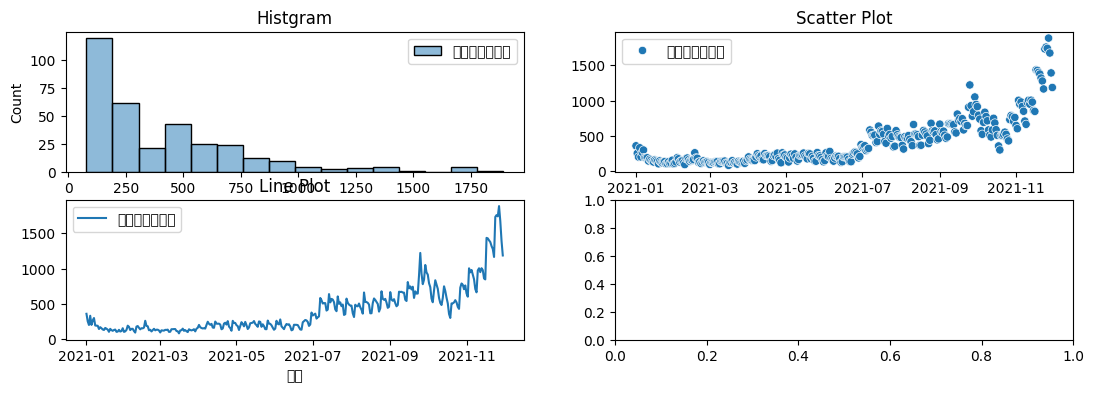

In [ ]:
# ts.scatter()
fig,axes =plt.subplots(2,2,figsize=(13,4))
axes[0,0].set_title('Histgram')
sns.histplot(data=ts_head,ax=axes[0,0])
axes[0,1].set_title('Scatter Plot')
sns.scatterplot(data=ts_head,ax=axes[0,1])
axes[1,0].set_title('Line Plot')
sns.lineplot(ts_head,ax=axes[1,0])
ts_head.describe().T

# 정상성 확인

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_head,regression='c',autolag='AIC')
result

(0.7623135388299531,
 0.9910028277484191,
 14,
 319,
 {'1%': -3.4510167751522642,
  '5%': -2.87064334231426,
  '10%': -2.5716201744283174},
 3534.1621298860905)

In [ ]:
from statsmodels.tsa.stattools import kpss
result = kpss(ts_head)
result

(2.2098185510810606,
 0.01,
 11,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

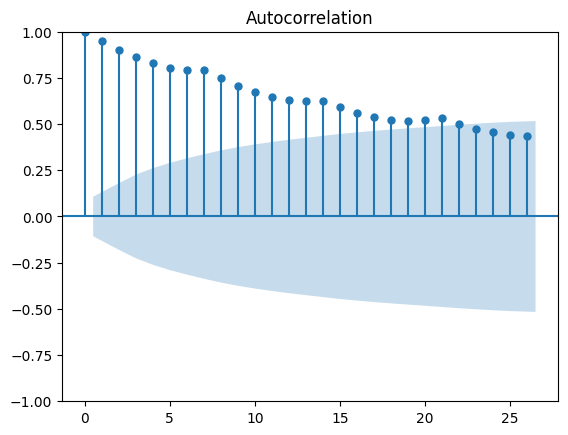

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(ts_head)
plt.show()

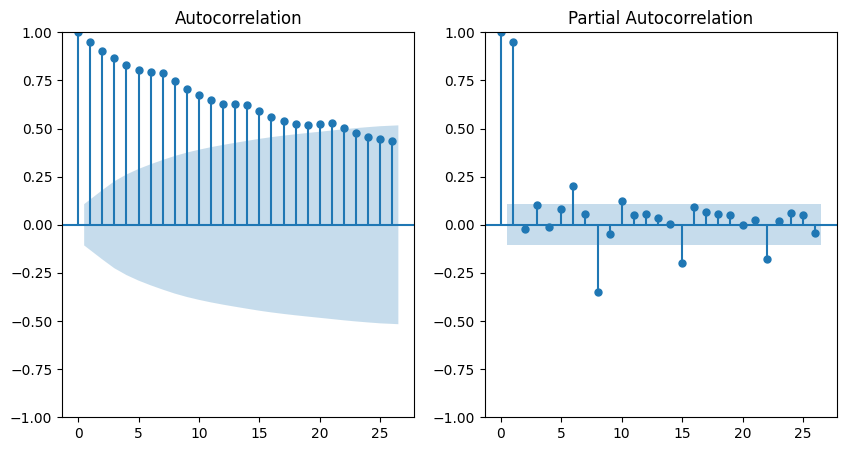

0시차:자기상관계수 1.000,신뢰구간1.000~1.000
1시차:자기상관계수 0.954,신뢰구간0.846~1.061
2시차:자기상관계수 0.907,신뢰구간0.727~1.087
3시차:자기상관계수 0.873,신뢰구간0.646~1.100
4시차:자기상관계수 0.839,신뢰구간0.577~1.102
5시차:자기상관계수 0.814,신뢰구간0.522~1.106
6시차:자기상관계수 0.809,신뢰구간0.492~1.126
7시차:자기상관계수 0.807,신뢰구간0.468~1.147
8시차:자기상관계수 0.768,신뢰구간0.407~1.129
9시차:자기상관계수 0.724,신뢰구간0.345~1.104


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf,pacf
fig,ax =plt.subplots(1,2,figsize=(10,5))
plot_acf(ts_head,ax=ax[0])
plot_pacf(ts_head,ax=ax[1])
plt.show()
ACs,confs = acf(ts_head,fft=False,nlags=9,alpha=0.05,adjusted=True)
for lag,ac,conf in zip(range(9+1),ACs,confs):
  print(f'{lag}시차:자기상관계수 {ac:.3f},신뢰구간{conf[0]:.3f}~{conf[1]:.3f}')

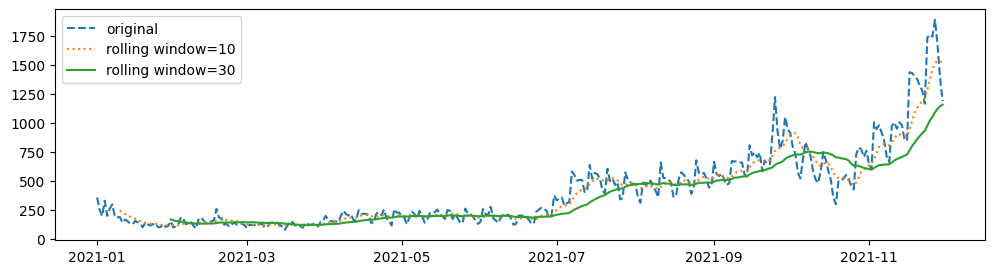

In [ ]:
fig,ax =plt.subplots(1,1,figsize=(12,3))
titles=['original','rolling window=10','rolling window=30']
rw10 = ts_head.rolling(window=10).mean().dropna()
rw30 = ts_head.rolling(window=30).mean().dropna()
data_list = [ts_head,rw10,rw30]
ls_lst =  ['dashed','dotted','solid']

for title,data,ls in zip(titles,data_list,ls_lst):
  ax.plot(data,label=title,linestyle=ls)
plt.legend()
plt.show()

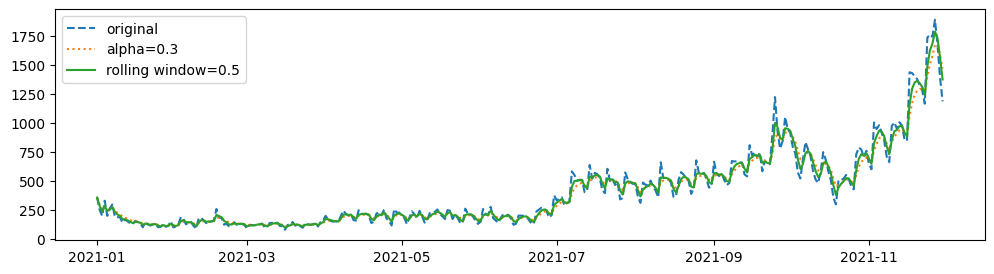

In [ ]:
fig,ax =plt.subplots(1,1,figsize=(12,3))
titles=['original','alpha=0.3','rolling window=0.5']
ewm03 = ts_head.ewm(alpha=0.3).mean()
ewm05 = ts_head.ewm(alpha=0.5).mean()
data_list = [ts_head,ewm03,ewm05]
ls_lst =  ['dashed','dotted','solid']

for title,data,ls in zip(titles,data_list,ls_lst):
  ax.plot(data,label=title,linestyle=ls)
plt.legend()
plt.show()

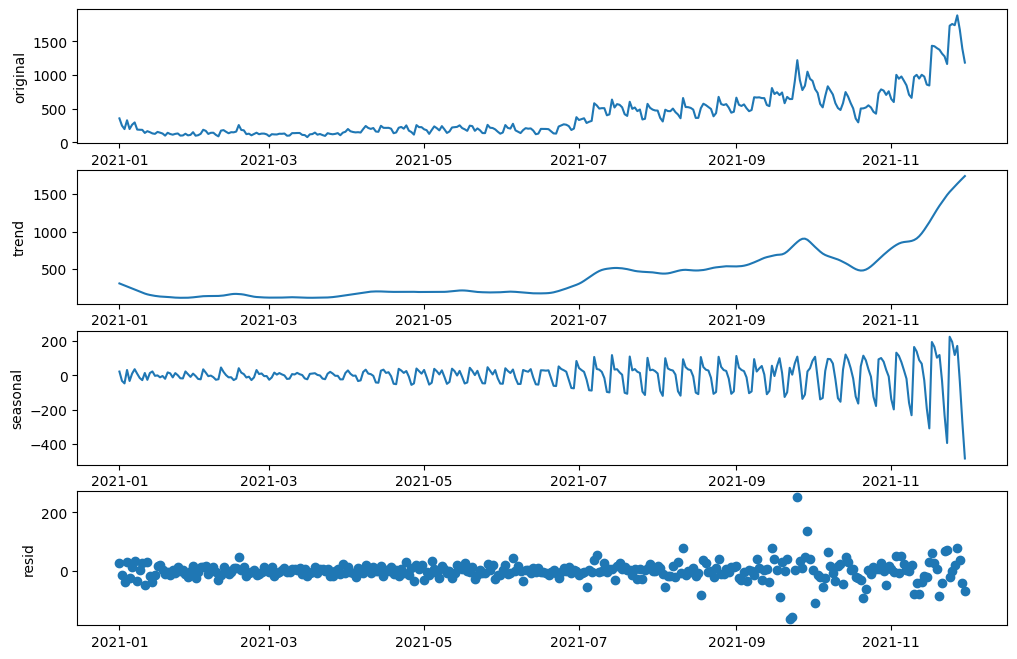

In [ ]:
from statsmodels.tsa.seasonal import STL
# fitted=STL(ts_head, seasonal=7,trend=9).fit()
fitted=STL(ts_head).fit()
resid=fitted.resid
seasonal=fitted.seasonal
trend=fitted.trend

titles=['original','trend','seasonal','resid']
data_list=[ts_head,trend,seasonal,resid]
fig,axes =plt.subplots(4,1,figsize=(12,8))
# for title,data,ax in zip(titles,data_list,axes):
#     ax.set_ylabel(title)
#     if title !='resid':
#       ax.plot(data)
#     else:
#       ax.scatter(x=data.index,y=data.values)
for title, data, ax in zip(titles, data_list, axes):
    ax.set_ylabel(title)
    if title != 'resid':
        ax.plot(data)
    else:
        ax.scatter(x=data.index,y=data.values)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.linear_model import LinearRegression
ts= pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/12_covid19.csv"
    ,encoding='euc_kr').filter(['날짜','전일대비증감수'])
# ts['날짜']= ts['날짜'].astype('datetime64')
ts['날짜']= pd.to_datetime(ts['날짜'],format='%Y-%m-%d')#, errors='ignore')
ts =ts.set_index('날짜')
ts_head=ts.head(334)
ts_tail=ts.tail(31)
# help(pd.to_datetime) type(ts.info())

In [ ]:
import datetime as dt
import time
timestamp=2551780740
datetime = dt.datetime.fromtimestamp(timestamp) # timestamp -> local 시간
utcdatetime = dt.datetime.utcfromtimestamp(timestamp) # timestamp -> UTC 시간
timestamp2 = time.mktime(datetime.timetuple())
# timestamp2 = time.mktime(datetime)
# help(dt.datetime.strptime)time.mktime)
# str = dt.datetime.strftime(datetime,'%Y-%m-%d %H:%M:%S')
# timestamp2 = time.mktime(str.tuple())

In [ ]:
date1 = dt.datetime(2023,2,20,16,1,1)
print(date1)
# date1 = dt.datetime.strptime('2023-02-20')
date = dt.datetime(2023,2,20)
print(date, type(date))
date_only = dt.date(2023,2,20)
print(date_only, type(date_only))
time_only = dt.time(16,1,20)
print(time_only, type(time_only))
date_Ym = dt.datetime.strptime('202402','%Y%m')
print(date_Ym, type(date_Ym))

2023-02-20 16:01:01
2023-02-20 00:00:00 <class 'datetime.datetime'>
2023-02-20 <class 'datetime.date'>
16:01:20 <class 'datetime.time'>
2024-02-01 00:00:00 <class 'datetime.datetime'>


In [ ]:
date_list1 = pd.date_range(date1,periods=9,freq='A')
print(date_list1)
date_list2 = pd.date_range('2016-01-22',periods=9,freq='M')
print(date_list2)
date_list3 = pd.date_range('2016-01-22',periods=9,freq='D')
print(date_list3)
date_list4 = pd.date_range('2016-01-22',periods=9,freq='W')
print(date_list4)
date_list5 = pd.date_range('2016-01-01 01:01:01','2016-01-02',freq='30T')
print(date_list5[:8])
#help(pd.date_range)
# list(range(2,19))type(np.arange(1.0,10.0,0.5))

DatetimeIndex(['2023-12-31 16:01:01', '2024-12-31 16:01:01',
               '2025-12-31 16:01:01', '2026-12-31 16:01:01',
               '2027-12-31 16:01:01', '2028-12-31 16:01:01',
               '2029-12-31 16:01:01', '2030-12-31 16:01:01',
               '2031-12-31 16:01:01'],
              dtype='datetime64[ns]', freq='A-DEC')
DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30'],
              dtype='datetime64[ns]', freq='M')
DatetimeIndex(['2016-01-22', '2016-01-23', '2016-01-24', '2016-01-25',
               '2016-01-26', '2016-01-27', '2016-01-28', '2016-01-29',
               '2016-01-30'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2016-01-24', '2016-01-31', '2016-02-07', '2016-02-14',
               '2016-02-21', '2016-02-28', '2016-03-06', '2016-03-13',
               '2016-03-20'],
              dtype='datetime64[ns]', freq='W-SUN')
D

In [ ]:
# date_list4 =  pd.period_range('2012-01-01',freq='A',periods=9) # help(date3.strftime)
date_list4 =  pd.period_range('2012-01-01','2030-01-01',freq='M')
print(date_list4)
date_list5 =  pd.period_range('2012-01-01','2030-01-01',freq='Q')
print(date_list5[:5])

PeriodIndex(['2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
             '2012-07', '2012-08', '2012-09', '2012-10',
             ...
             '2029-04', '2029-05', '2029-06', '2029-07', '2029-08', '2029-09',
             '2029-10', '2029-11', '2029-12', '2030-01'],
            dtype='period[M]', length=217)
PeriodIndex(['2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1'], dtype='period[Q-DEC]')


In [ ]:
date3 = dt.datetime(2023,3,2,0,1,1)
date31 = dt.datetime(2023,12,20,0,1,10)
print(date3)
date_c1 = date3.strftime('%Y-%m-%d')
date_c1 = date3.strftime('%Y년 %m월 %d일')
date_c11 = date31.strftime('%Y년 %m월 %d일')
date_c12 = date31.strftime('%y년 %m월 %d일')
print(date_c1)
print(date_c11)
print(date_c12)

2023-03-02 00:01:01
2023년 03월 02일
2023년 12월 20일
23년 12월 20일


In [ ]:
print(date3)
date_c1 = date3.strftime('%Y-%m-%d')
date_c1 = dt.datetime.strftime(date3,'%Y-%m-%d')
# date_c1 = date3.strftime('%Y년 %m월 %d일')
# date_c11 = date31.strftime('%Y년 %m월 %d일')
# date_c12 = date31.strftime('%y년 %m월 %d일')
print(date_c1)
# print(date_c11)
# print(date_c12)

2023-03-02 00:01:01
2023-03-02


In [ ]:
date4 = date3.replace(year= 2022,minute=2)
print(date3)
date4 = date3.replace(year= 2022,minute=2,hour = 21)
print(date4)

2023-03-02 00:01:01
2022-03-02 21:02:01


In [ ]:
date_only = dt.date(2019,1,1)
time_only = dt.time(10,0,5)
datetime1 = dt.datetime.combine(date_only,time_only)
ym = datetime1.strftime('%Y%m')

In [ ]:
weeks1 = dt.timedelta(weeks=1)
today1 = dt.date.today() #help(dt)
print(today1)
today2 = dt.datetime.today() #help(dt)
print(today2)
localtime = dt.datetime.fromtimestamp(timestamp)
date2 = localtime.date() #help(dt)
print(date2)
time2 = localtime.time() #help(dt)
print(time2)

print(today1 -weeks1)
print(today1 +weeks1)

2024-02-13
2024-02-13 05:50:09.986908
2050-11-11
11:59:00
2024-02-06
2024-02-20


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.linear_model import LinearRegression
ts= pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/12_covid19.csv"
    ,encoding='euc_kr').filter(['날짜','전일대비증감수'])
ts['날짜']= ts['날짜'].astype('datetime64')
ts['날짜_y']= ts['날짜'].dt.year
ts['날짜_wd']= ts['날짜'].dt.weekday.map({0:'월요일',1:'화요일',2:'수요일',3:'목요일',4:'금요일',5:'토요일',6:'일요일'})
ts['날짜_name']= ts['날짜'].dt.day_name()
ts

,날짜,전일대비증감수,날짜_y,날짜_wd,날짜_name
0,2021-01-01,357,2021,금요일,Friday
1,2021-01-02,250,2021,토요일,Saturday
2,2021-01-03,198,2021,일요일,Sunday
3,2021-01-04,329,2021,월요일,Monday
4,2021-01-05,199,2021,화요일,Tuesday
...,...,...,...,...,...
360,2021-12-27,1496,2021,월요일,Monday
361,2021-12-28,1290,2021,화요일,Tuesday
362,2021-12-29,1915,2021,수요일,Wednesday
363,2021-12-30,1722,2021,목요일,Thursday


# 업샘플링, 다운샘플링

In [ ]:
from sklearn.linear_model import LinearRegression
ts= pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/12_covid19.csv"
    ,encoding='euc_kr')
ts['날짜']= ts['날짜'].astype('datetime64') # ts.info()
ts = ts.set_index('날짜')

In [ ]:
ts.resample(rule='Q').asfreq() # help(ts.resample)
# ts.loc['2021-03-31':,:]
print("[freq='Q',asfreq]")
print(ts.resample(rule='Q').asfreq())

[freq='Q',asfreq]
            누적확진자수  전일대비증감수
날짜                         
2021-03-31   32029      158
2021-06-30   49986      375
2021-09-30  100492      945
2021-12-31  225235     1670


In [ ]:
ts.resample(rule='Q').sum() # help(ts.resample)
# ts.loc['2021-03-31':,:]

,누적확진자수,전일대비증감수
날짜,,
2021-03-31,2357075,13034
2021-06-30,3726692,17957
2021-09-30,6672971,50508
2021-12-31,13440595,124799


In [ ]:
ts.loc[:'2021-03-31',:].sum()

누적확진자수     2357075
전일대비증감수      13034
dtype: int64

In [ ]:
ts.resample(rule='Q').mean() # help(ts.resample)
# ts.loc['2021-03-31':,:]

,누적확진자수,전일대비증감수
날짜,,
2021-03-31,26189.722222,144.822222
2021-06-30,40952.659341,197.329670
2021-09-30,72532.293478,549.000000
2021-12-31,146093.423913,1356.510870


In [ ]:
ts= pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/12_covid19.csv"
    ,encoding='euc_kr').filter(['날짜','전일대비증감수'])
ts.isnull().sum()
ts['날짜']= ts['날짜'].astype('datetime64') # ts.info()
ts = ts.set_index('날짜')
ts

,전일대비증감수
날짜,
2021-01-01,357
2021-01-02,250
2021-01-03,198
2021-01-04,329
2021-01-05,199
...,...
2021-12-27,1496
2021-12-28,1290
2021-12-29,1915


In [ ]:
ts_na = ts.copy()
import numpy as np
random_numbers = np.random.randint(0,len(ts)-1,50)
ts_na.iloc[random_numbers,:] =np.nan

In [ ]:
ts_na.isnull().sum()#  ts_na.info()

전일대비증감수    47
dtype: int64

In [ ]:
linear = ts_na.interpolate(method ='linear')
nearest = ts_na.interpolate(method ='nearest')
zero = ts_na.interpolate(method ='zero')
quadratic = ts_na.interpolate(method ='quadratic')
cubic = ts_na.interpolate(method ='cubic')
spline = ts_na.interpolate(method ='spline',order = 2)
polynomial = ts_na.interpolate(method ='polynomial',order = 3)
titles = ['linear','nearest','zero','quadractic','cubic','spline','polynomial']
data_list = [linear,nearest,zero,quadratic,cubic,spline,polynomial]
sqrd_error=[]
abs_error = []
for title, data in zip(titles,data_list):
  sqrd_e =sum((ts - data)['전일대비증감수']**2)
  abs_e =sum(abs(ts - data)['전일대비증감수'])
  sqrd_error.append(int(sqrd_e))
  abs_error.append(int(abs_e))
  # print(sum((ts - data)['전일대비증감수']**2))
# sqrd_error.pl/t.bar(x=titles)

<Axes: title={'center': 'abs_error Plot'}>

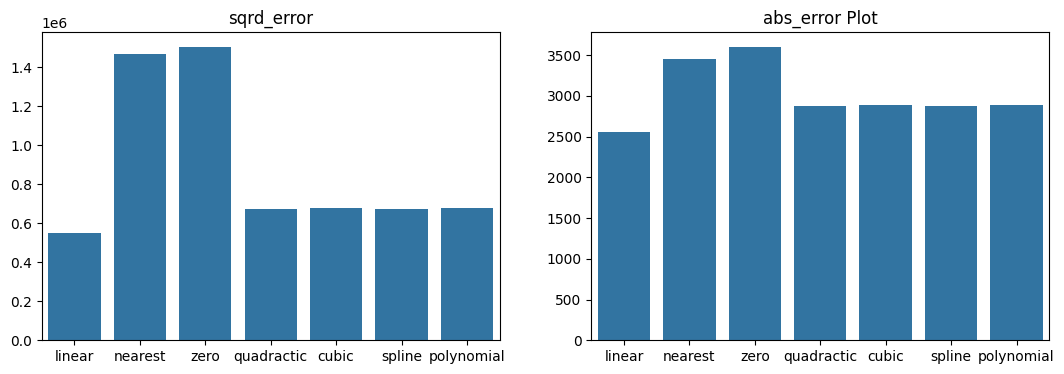

In [ ]:
fig,axes =plt.subplots(1,2,figsize=(13,4))
axes[0].set_title('sqrd_error')
sns.barplot(x = titles ,y=sqrd_error,ax=axes[0])
axes[1].set_title('abs_error Plot')
sns.barplot(x = titles ,y=abs_error,ax=axes[1])


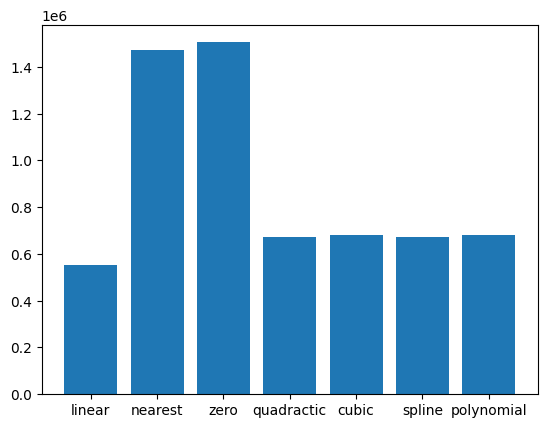

In [ ]:
plt.bar(titles, sqrd_error)
plt.show()

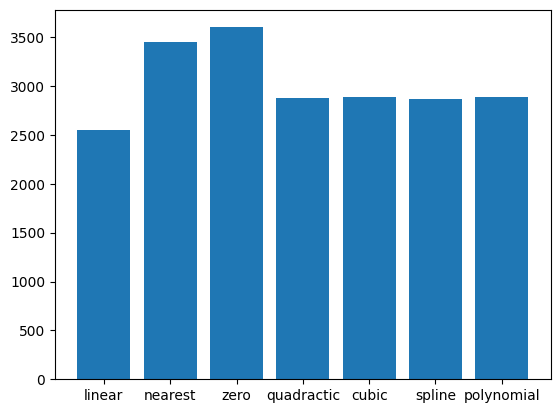

In [ ]:
plt.bar(titles, abs_error)
plt.show()

In [ ]:
ts= pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/12_covid19.csv"
    ,encoding='euc_kr').filter(['날짜','전일대비증감수'])
ts1= pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/12_covid19.csv"
    ,encoding='euc_kr')
# ts12 = ts1.filter(['날짜'])
# ts12 = ts1.select_dtypes(exclude=['int64'])
# ts12.columns
# ts = ts.set_index('날짜')
# ts2 = ts1.copy()
# ts3 = ts1 *2
# ts['날짜']  = pd.to_datetime(ts['날짜'])
ts['날짜']  = ts['날짜'].astype('datetime64')
ts = ts.set_index('날짜')
ts_head = ts.head(334)
ts_tail = ts.tail(31)
ts_head_d = ts_head.copy()

adfuller => 0.991   kpss => 0.01
adfuller => 0.004   kpss => 0.1
adfuller => 0.005   kpss => 0.1


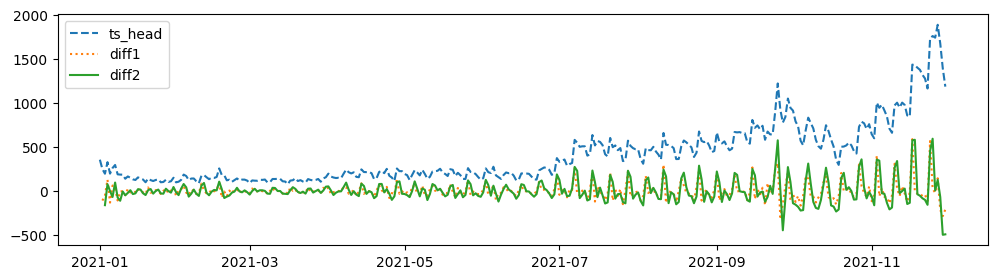

In [ ]:
ts_head_d['diff1'] = ts_head['전일대비증감수'].diff(1)
ts_head_d['diff2'] = ts_head['전일대비증감수'].diff(2)
ts_head_d['diff1a'] = ts_head_d['diff1'].diff(1)
from statsmodels.tsa.stattools import adfuller,kpss
fig,ax = plt.subplots(1,1,figsize=(12,3))
data_list = [ts_head,ts_head_d['diff1'].dropna(),ts_head_d['diff2'].dropna()]#,ts_head_d['diff1a'].dropna()]
titles = ['ts_head','diff1','diff2']#,'diff1a']
ls_list = ['dashed','dotted','solid']#,'dashdot']

for title,data,ls in zip(titles,data_list,ls_list):
  ax.plot(data,label=title,linestyle = ls)
  ap= adfuller(data)[1]
  kp= kpss(data)[1]
  print('adfuller =>',round(ap,3) ,'  kpss =>',round(kp,3) )
plt.legend()
plt.show()

adfuller => 0.991   kpss => 0.01
adfuller => 0.001   kpss => 0.1
adfuller => 0.0   kpss => 0.1


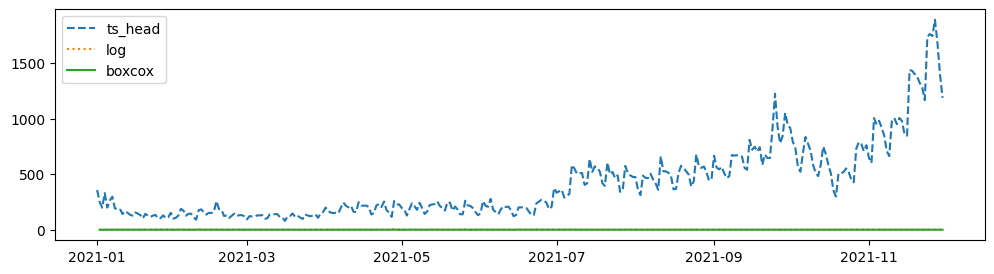

In [ ]:
from statsmodels.tsa.stattools import adfuller,kpss
from sklearn.preprocessing import PowerTransformer
#log변환
log1=np.log(ts_head)
#boxcox변환
pt=PowerTransformer(method='box-cox')
rescaled = pt.fit_transform(ts_head)
boxcox1= pd.DataFrame(rescaled,index=ts_head.index,columns=ts_head.columns)
#1차분
log2 = log1.diff(1).dropna()
boxcox2 = boxcox1.diff(1).dropna()

fig,ax = plt.subplots(1,1,figsize=(12,3))
data_list = [ts_head,log2,boxcox2]
titles = ['ts_head','log','boxcox']
ls_list = ['dashed','dotted','solid']
for title,data,ls in zip(titles,data_list,ls_list):
  ax.plot(data,label=title,linestyle = ls)
  ap= adfuller(data)[1]
  kp= kpss(data)[1]
  print('adfuller =>',round(ap,3) ,'  kpss =>',round(kp,3) )
plt.legend()
plt.show()

log  adfuller => 0.0007   kpss => 0.1
boxcox  adfuller => 0.0004   kpss => 0.1


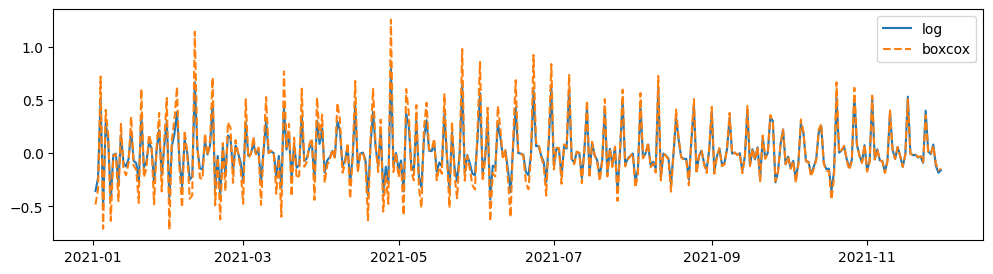

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(12,3))
data_list = [log2,boxcox2]
titles = ['log','boxcox']
ls_list = ['solid','dashed']
for title,data,ls in zip(titles,data_list,ls_list):
  ax.plot(data,label=title,linestyle = ls)
  ap= adfuller(data)[1]
  kp= kpss(data)[1]
  print(title,' adfuller =>',round(ap,4) ,'  kpss =>',round(kp,4) )
plt.legend()
plt.show()

#시계열 모델링 및 평가

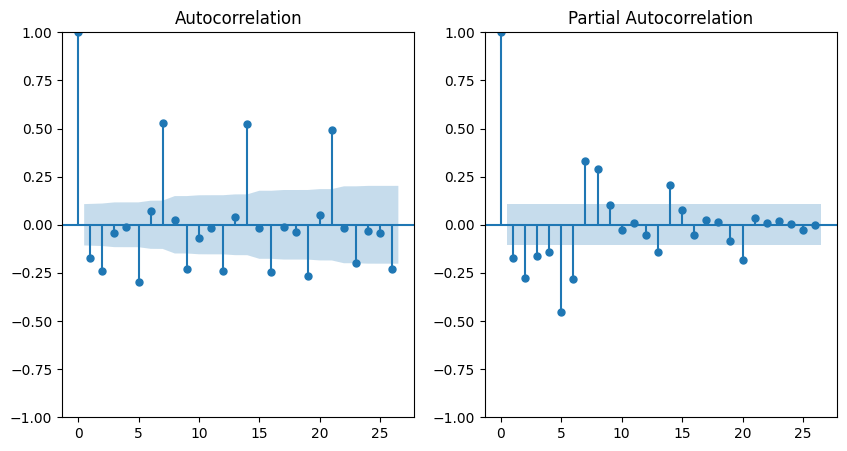

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig,ax = plt.subplots(1,2,figsize=(10,5))
plot_acf(boxcox2,ax=ax[0])
plot_pacf(boxcox2,ax=ax[1])
plt.show()

## 임의로 지정한 ARIMA

In [ ]:
p=9
d=1
q=2

P = 0
D = 0
Q = 1
s = 7
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= ARIMA(ts_head,order=(p,d,q), seasonal_order=(P,D,Q,s))
fitted = model.fit()
resid = fitted.resid

In [ ]:
pred1 = fitted.forecast(31)
pred2 = fitted.predict(start=ts_tail.index[0],end=ts_tail.index[-1])
print(fitted.summary())

                                     SARIMAX Results                                     
Dep. Variable:                           전일대비증감수   No. Observations:                  334
Model:             ARIMA(9, 1, 2)x(0, 0, [1], 7)   Log Likelihood               -1854.018
Date:                           Tue, 13 Feb 2024   AIC                           3734.036
Time:                                   05:50:23   BIC                           3783.542
Sample:                               01-01-2021   HQIC                          3753.777
                                    - 11-30-2021                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0277      1.000     -0.028      0.978      -1.988       1.932
ar.L2         -0.1714      0.495     -0.346

## auto-ARIMA

In [ ]:
pip install pmdarima

In [ ]:
from pmdarima import auto_arima
auto_arima(ts_head,start_p = 1, start_q = 1, max_p = 5, start_P = 0, start_Q =0,max_P=5,
     max_Q =5,m=7,seasonal=True,trace =True,error_action='warn',suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=3965.874, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=3990.304, Time=0.12 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=3802.367, Time=0.85 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=3895.152, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=3988.527, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=3991.211, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=3745.264, Time=1.05 sec
 ARIMA(1,1,0)(3,0,0)[7] intercept   : AIC=inf, Time=7.60 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=3726.653, Time=5.27 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=3725.616, Time=3.35 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=3898.086, Time=0.61 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=3726.781, Time=3.18 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=3848.939, Time=1.67 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=5.96 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=3

ARIMA(order=(3, 1, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True, with_intercept=False)

In [ ]:
model= ARIMA(ts_head,order=(3,1,0), seasonal_order=(1,0,1,7))
fitted = model.fit()
resid = fitted.resid

In [ ]:
pred3 = fitted.forecast(31)
pred4 = fitted.predict(start=ts_tail.index[0],end=ts_tail.index[-1])
print(fitted.summary())

                                     SARIMAX Results                                     
Dep. Variable:                           전일대비증감수   No. Observations:                  334
Model:             ARIMA(3, 1, 0)x(1, 0, [1], 7)   Log Likelihood               -1852.753
Date:                           Tue, 13 Feb 2024   AIC                           3717.507
Time:                                   05:53:18   BIC                           3740.355
Sample:                               01-01-2021   HQIC                          3726.618
                                    - 11-30-2021                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2260      0.036     -6.292      0.000      -0.296      -0.156
ar.L2         -0.1731      0.039     -4.395

## for loop ARIMA

In [ ]:
import itertools
p=range(0,4)
d=range(1,2)
q=range(0,3)
P=Q=D = range(0,2)
m=[4,7,12]
combis = list(itertools.product(p,d,q,P,D,Q,m))
dict_model={}
for i,combi in enumerate(combis):
    try:
        no_seasonal = combi[:3]
        seasonal = combi[3:]
        model = ARIMA(ts_head,order=(no_seasonal),seasonal_order=(seasonal))
        fitted = model.fit()
        dict_model[combi] =[fitted.llf,fitted.aic]
    except:
        print('except:', i,combi)
        continue
result=pd.DataFrame.from_dict(dict_model,orient='index',columns=['llf','AIC']).sort_values(by='AIC',ascending=True)
print(result)

                               llf          AIC
(1, 1, 0, 1, 0, 1, 7)     0.000000     8.000000
(3, 1, 1, 0, 1, 1, 7) -1807.948928  3627.897856
(3, 1, 2, 0, 1, 1, 7) -1807.943777  3629.887554
(3, 1, 0, 0, 1, 1, 7) -1810.092109  3630.184218
(0, 1, 2, 0, 1, 1, 7) -1811.281482  3630.562964
...                            ...          ...
(3, 1, 0, 0, 1, 0, 4) -2067.112994  4142.225988
(2, 1, 0, 0, 1, 0, 4) -2086.585068  4179.170136
(0, 1, 1, 0, 1, 0, 4) -2088.194196  4180.388392
(1, 1, 0, 0, 1, 0, 4) -2088.409186  4180.818373
(0, 1, 0, 0, 1, 0, 4) -2089.657718  4181.315436

[288 rows x 2 columns]


In [ ]:
model= ARIMA(ts_head,order=(3,1,1), seasonal_order=(0,1,1,7))
fitted = model.fit()
resid = fitted.resid
pred5 = fitted.forecast(31)
pred6 = fitted.predict(start=ts_tail.index[0],end=ts_tail.index[-1])
print(fitted.summary())

                                    SARIMAX Results                                    
Dep. Variable:                         전일대비증감수   No. Observations:                  334
Model:             ARIMA(3, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -1807.949
Date:                         Tue, 13 Feb 2024   AIC                           3627.898
Time:                                 05:59:12   BIC                           3650.619
Sample:                             01-01-2021   HQIC                          3636.965
                                  - 11-30-2021                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9659      0.108     -8.966      0.000      -1.177      -0.755
ar.L2         -0.3312      0.046     -7.160      0.000     

In [ ]:
from sklearn.metrics import r2_score
def  MAPE(y_true,y_pred):
  mape= np.mean(np.abs((y_true - y_pred)/y_true)) *100
  return mape
titles = ['box-jenkins','auto_arima','for-loop']
ts_tail1d = ts_tail.values.ravel()
preds = [pred1.values,pred3.values,pred5.values]
for title,pred in zip(titles, preds):
  r2 = r2_score(ts_tail1d,pred)
  mape =MAPE(ts_tail1d,pred)
  print(title ,'=> r2 :',r2,' mape :',mape)


box-jenkins => r2 : -1.5184378906301155  mape : 26.663843630983564
auto_arima => r2 : -0.7397039564883581  mape : 24.503169788127856
for-loop => r2 : -0.6669362440700677  mape : 24.4471542664949


#연습문제

In [ ]:
ms= pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice12_ms_stock.csv"
    ,encoding='euc_kr')
ms['Date']  = ms['Date'].astype('datetime64')
ms = ms.set_index('Date')
ms.info()
# ts_head = ts.head(334)
# ts_tail = ts.tail(31)
# ts_head_d = ts_head.copy()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-04-01 16:00:00 to 2021-03-31 16:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1511 non-null   float64
dtypes: float64(1)
memory usage: 23.6 KB


##1.다운샘플링후 데이터 분할

In [ ]:
ms_dwn =ms.resample(rule='W').mean()

In [ ]:
# ms.loc['2021-03-15 16:00:00': '2021-03-21 16:00:00'].mean

In [ ]:
down_head=  ms_dwn.head(300)
down_tail=  ms_dwn.tail(14)
down_head.shape,down_tail.shape

((300, 1), (14, 1))

##2.EDA

(array([82., 51., 28., 43., 15., 27., 14., 11.,  7., 22.]),
 array([ 40.505 ,  58.7745,  77.044 ,  95.3135, 113.583 , 131.8525,
        150.122 , 168.3915, 186.661 , 204.9305, 223.2   ]),
 <BarContainer object of 10 artists>)

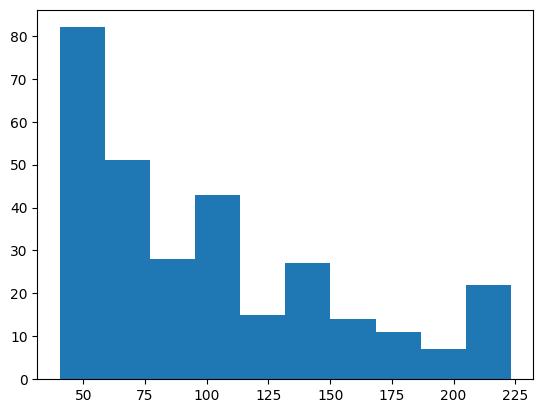

In [ ]:
plt.hist(down_head)

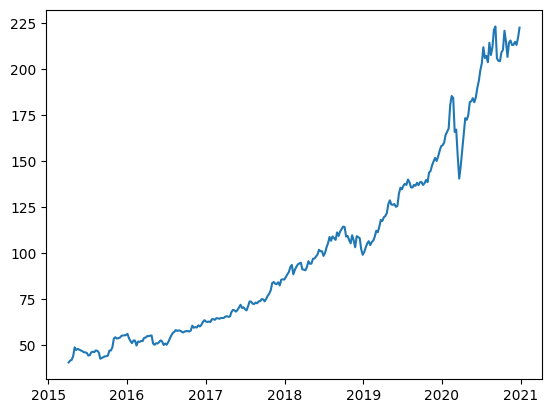

In [ ]:
plt.plot(down_head)

<Axes: xlabel='Date', ylabel='Close'>

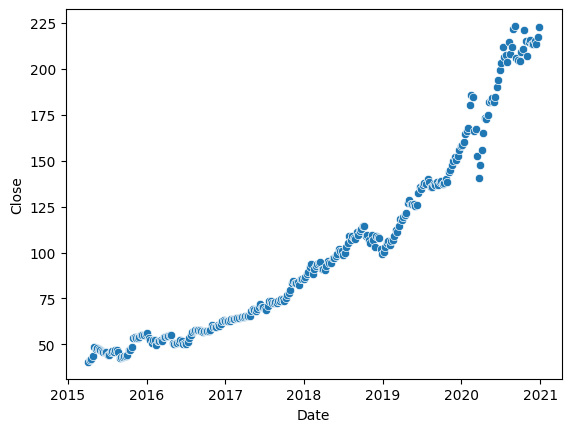

In [ ]:
sns.scatterplot(x=down_head.index,y=down_head.Close)

In [ ]:
# 정상성 확인(h0:정상성이 아니다. h1:정상성이다)
from statsmodels.tsa.stattools import adfuller
result = adfuller(down_head,regression='c',autolag='AIC')
result #  p-value가 0.998로 정상성이 아니다.

(2.2398006833134594,
 0.998913687800196,
 5,
 294,
 {'1%': -3.452789844280995,
  '5%': -2.871421512222641,
  '10%': -2.5720351510944512},
 1469.1240999714705)

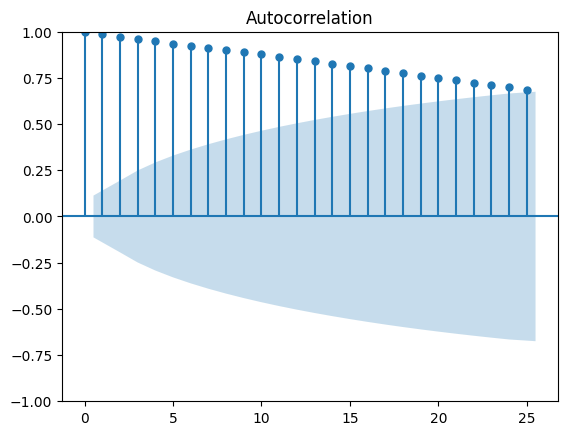

In [ ]:
# acf plot확인 하기
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(down_head)
plt.show()

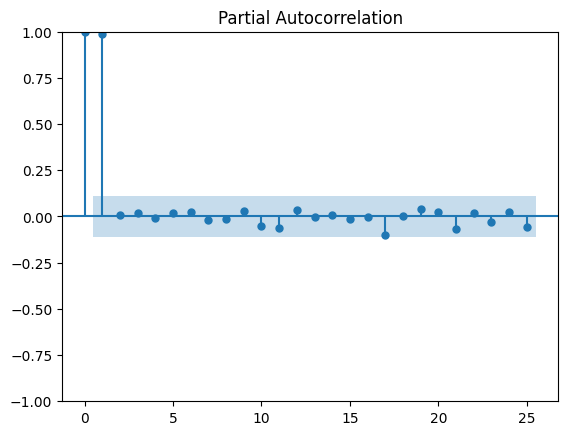

In [ ]:
plot_pacf(down_head) # acf는 천천히 떨어지기 때문에 비정상성, pacf는 급격히 떨어짐
plt.show()

##3.모델 적합

In [ ]:
auto_arima = auto_arima(down_head,start_p=1, start_q =1,max_p=3,max_q =3,start_P =0,start_Q =0,max_P=3
                        ,max_Q =3, m=7,seasonal=True,trace=True,error_action='warn',suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=1556.843, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1555.587, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1556.494, Time=0.58 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=1556.308, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1563.963, Time=0.08 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=1556.744, Time=0.38 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=1556.686, Time=0.36 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=1558.222, Time=1.20 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=1555.289, Time=0.13 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=1556.446, Time=0.40 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=1558.077, Time=0.95 sec
 ARIMA(2,1,0)(0,0,0)[7] intercept   : AIC=1556.505, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=1555.063, Time=0.17 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=1556.351, Time=0.43 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept

In [ ]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  300
Model:             SARIMAX(3, 1, 2)x(1, 0, [1], 7)   Log Likelihood                -765.483
Date:                             Tue, 13 Feb 2024   AIC                           1548.965
Time:                                     06:18:44   BIC                           1582.269
Sample:                                 04-05-2015   HQIC                          1562.295
                                      - 12-27-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3957      0.158      2.498      0.012       0.085       0.706
ar.L1          0.0035      0.095      0.037      0.971      -0.183       0.190
ar.L2          0.7797      0.092      8.514      0.000       0.600       0.959
ar.L3         -0.2122      0.044     -4.826      0.000      -0.298      -0.126
ma.L1          0.1048      0.092      1.133      0.257      -0.076       0.286
ma.L2         -0.8209      0.098     -8.413      0.000      -1.012      -0.630
ar.S.L7       -0.5356      0.188     -2.843      0.004      -0.905      -0.166
ma.S.L7        0.6879      0.161      4.271      0.000       0.372       1.004
sigma2         9.7643      0.471     20.727      0.000       8.841      10.688
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               832.42
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):              12.37   Skew:                            -0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##4.예측 및 평가

In [ ]:
pred = auto_arima.predict(len(down_tail))

2021-01-03    223.077172
2021-01-10    223.741860
2021-01-17    222.479766
2021-01-24    223.574256
2021-01-31    222.885502
2021-02-07    224.550845
2021-02-14    223.763448
2021-02-21    224.945498
2021-02-28    224.837347
2021-03-07    226.588909
2021-03-14    226.287590
2021-03-21    227.839299
2021-03-28    227.341128
2021-04-04    229.021781
Freq: W-SUN, dtype: float64

In [ ]:
from sklearn.metrics import f1_score,accuracy_score,r2_score,mean_squared_error
# accuracy_score(list(down_tail['Close']),list(pred))
# r2_score(down_tail.values.ravel(),pred.values.ravel())
mean_squared_error(down_tail,pred)

106.07212710816962

In [ ]:
down_tail

,Close
Date,
2021-01-03,223.302500
2021-01-10,217.150000
2021-01-17,214.886000
2021-01-24,222.925000
2021-01-31,233.130000
2021-02-07,241.274000
2021-02-14,243.708000
2021-02-21,243.165000
2021-02-28,232.740000


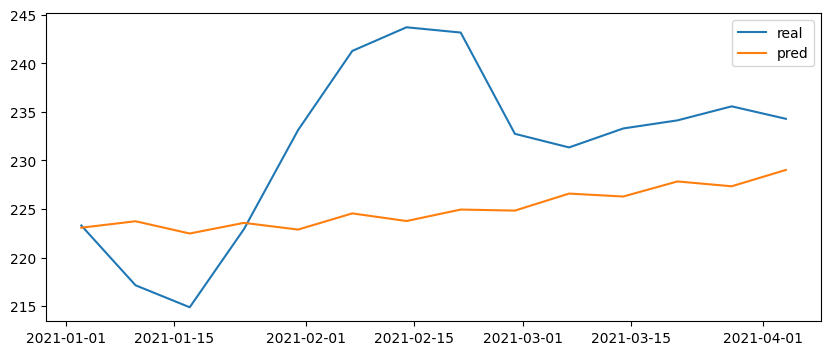

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(down_tail,label = 'real')
plt.plot(pred,label = 'pred')
plt.legend()